In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import tensorflow 
import matplotlib.pyplot as plt

2022-05-31 23:52:42.265661: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 23:52:42.265691: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
train_img = np.load('data/k49-train-imgs.npz')['arr_0']
train_label = np.load('data/k49-train-labels.npz')['arr_0']

test_img = np.load('data/k49-test-imgs.npz')['arr_0']
test_label = np.load('data/k49-test-labels.npz')['arr_0']

char_df = pd.read_csv('data/k49_classmap.csv', encoding = 'utf-8')

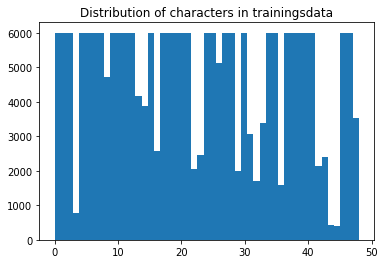

In [17]:
plt.hist(train_label,bins=49)
plt.title('Distribution of characters in trainingsdata')
plt.show()

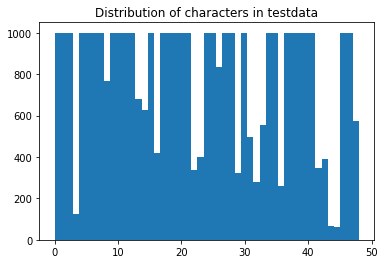

In [18]:
plt.hist(test_label,bins=49)
plt.title('Distribution of characters in testdata')
plt.show()

In [25]:
#Normalise

train_img = train_img / 255.0
test_img = test_img / 255.0


In [26]:
img_rows, img_cols = train_img.shape[1:]

X = np.expand_dims(train_img, axis=-1)
x_test = np.expand_dims(test_img, axis=-1)
y = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)


In [27]:
x_train, x_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2)

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(img_rows,img_cols,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

In [32]:
model.fit(x_train,y_train,batch_size=100, epochs=3,verbose=1, validation_data=(x_val,y_val))

Epoch 1/3
1859/1859 [==============================] - 334s 179ms/step - loss: 0.2134 - accuracy: 0.9392 - val_loss: 0.1506 - val_accuracy: 0.9597
Epoch 2/3
1859/1859 [==============================] - 329s 177ms/step - loss: 0.1879 - accuracy: 0.9458 - val_loss: 0.1461 - val_accuracy: 0.9611
Epoch 3/3
1859/1859 [==============================] - 336s 181ms/step - loss: 0.1748 - accuracy: 0.9496 - val_loss: 0.1462 - val_accuracy: 0.9626


In [33]:
results = model.evaluate(x_test, y_test, batch_size=100)
print("test loss, test acc:", results)


386/386 [==============================] - 17s 44ms/step - loss: 0.3130 - accuracy: 0.9239
test loss, test acc: [0.31298157572746277, 0.9239110946655273]
